In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style='darkgrid')

In [2]:
df = pd.read_csv("C:\\Users\\prasa\\Downloads\\netflix_titles.csv\\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print("Shape of the dataset:", df.shape)
print(df.info())
print(df.isnull().sum())

Shape of the dataset: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
list

In [6]:
# Drop rows where 'date_added' is missing
df = df.dropna(subset=['date_added'])

In [7]:
# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

In [10]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

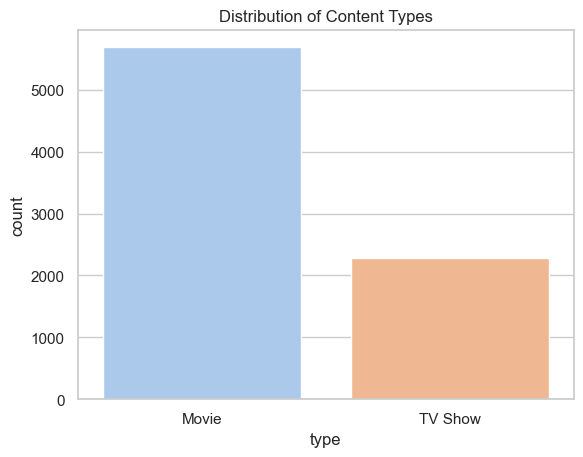

In [13]:
# Movies vs TV Shows

sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Content Types')
plt.show()

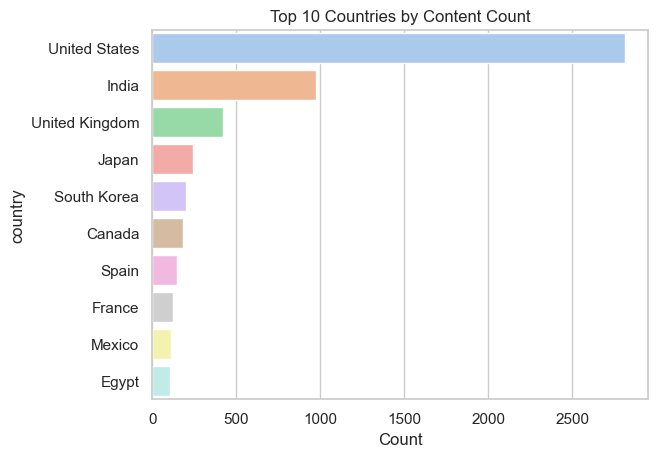

In [15]:
# Top 10 Content-Producing Countries

top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='pastel')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Count')
plt.show()

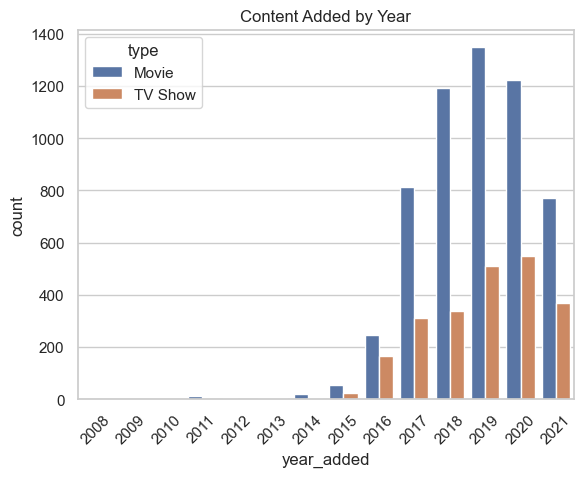

In [16]:
# Content Added Per Year

sns.countplot(data=df, x='year_added', hue='type', order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added by Year')
plt.xticks(rotation=45)
plt.show()

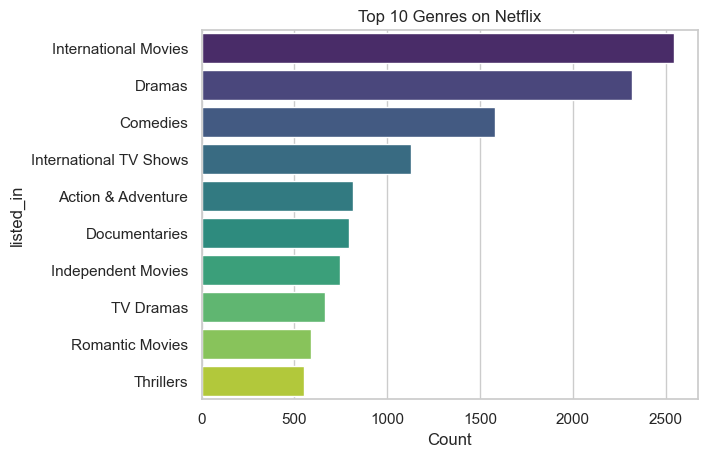

In [17]:
# Most Common Genres from listed_in

genre_series = df['listed_in'].str.split(', ').explode()
top_genres = genre_series.value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.show()

### Insights

- Netflix has added more content in recent years, peaking around 2019–2020.
- Movies are more numerous than TV Shows overall.
- The United States, India, and the UK are the top content-producing countries.
- Top genres include Documentaries, International TV Shows, and Dramas.


### Hypotheses

1. Netflix added significantly more content after 2016.
2. The most frequent genres are Drama and Documentaries.
3. TV Shows are increasingly popular in recent years.
